In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !unzip  /content/gdrive/MyDrive/data/archive.zip -d /content/gdrive/MyDrive/data/

In [ ]:
import pandas as pd
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
os.chdir('/content/gdrive/MyDrive/data/')

In [ ]:
files = [x for x in os.listdir()  if x.endswith('csv') if not x in ['divvy-tripdata_Quality_Report.csv']]
files

['202103-divvy-tripdata.csv',
 '202104-divvy-tripdata.csv',
 '202105-divvy-tripdata.csv',
 '202106-divvy-tripdata.csv',
 '202107-divvy-tripdata.csv',
 '202108-divvy-tripdata.csv',
 '202109-divvy-tripdata.csv',
 '202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv']

# **Loading Datasets**

---



### **Merging all months data into One single Dataframe**

In [ ]:
final_data = pd.DataFrame()
attributes = []
for file in files:
  data = pd.read_csv(file)
  # print(data.columns)
  attributes.append(list(data.columns),)
  final_data = final_data.append(data)
  # print(f"{file} columns considered!")
  print(f"\nFile:{file}, Total Rows:{data.shape[0]}, Total Attribues:{data.shape[1]}")


File:202103-divvy-tripdata.csv, Total Rows:228496, Total Attribues:13

File:202104-divvy-tripdata.csv, Total Rows:337230, Total Attribues:13

File:202105-divvy-tripdata.csv, Total Rows:531633, Total Attribues:13

File:202106-divvy-tripdata.csv, Total Rows:729595, Total Attribues:13

File:202107-divvy-tripdata.csv, Total Rows:822410, Total Attribues:13

File:202108-divvy-tripdata.csv, Total Rows:804352, Total Attribues:13

File:202109-divvy-tripdata.csv, Total Rows:756147, Total Attribues:13

File:202110-divvy-tripdata.csv, Total Rows:631226, Total Attribues:13

File:202111-divvy-tripdata.csv, Total Rows:359978, Total Attribues:13

File:202112-divvy-tripdata.csv, Total Rows:247540, Total Attribues:13

File:202201-divvy-tripdata.csv, Total Rows:103770, Total Attribues:13

File:202202-divvy-tripdata.csv, Total Rows:115609, Total Attribues:13


In [ ]:
all_columns = list(set(list(itertools.chain(*attributes))))
all_columns

['ride_id',
 'end_lat',
 'end_station_id',
 'started_at',
 'end_lng',
 'member_casual',
 'start_station_name',
 'ended_at',
 'start_lat',
 'end_station_name',
 'start_lng',
 'start_station_id',
 'rideable_type']

In [ ]:
print("Total Records:",final_data.shape[0])
print("Total Attributes:",final_data.shape[1])

Total Records: 5667986
Total Attributes: 13


In [ ]:
final_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual


In [ ]:
list(final_data.rideable_type.unique())

['classic_bike', 'electric_bike', 'docked_bike']

# **Data Integrity Check**

---



### **Quality Report Preparation**

In [ ]:
# def quality_report(df):
#     """
#         Purpose : to create a report of column wise missing value and unique value counts and datatypes 
#         Input : Dataframe
#         Output : Dataframe with columns names, 
#         types, no of observations, no of missing rows, No of unique values,
#         % of data avaliable, % of data missing and 
#         "Average","SD","Minimum Value","25%","50%","75%","Maximum Value"
#         Usage : quality_report(df)

#     """
#     df = df.apply(lambda col: pd.to_datetime(col, errors='ignore') if col.dtypes == object else col,axis=0)
#     quality_df = pd.DataFrame()
#     quality_df["Column Name"]=df.columns.sort_values()
# #     for cols in quality_df["Column /Name"]:
# #         quality_df.loc[quality_df["Column Name"]==cols,"Maximum Characters Occupied"]=get_length(df,cols)
# #         quality_df.loc[quality_df["Column Name"]==cols,"Minimim Characters Occupied"]=get_length(df,cols,max_=False)
# #     quality_df['Maximum Characters Occupied']=quality_df['Maximum Characters Occupied'].astype(int)
# #     quality_df['Minimim Characters Occupied']=quality_df['Minimim Characters Occupied'].astype(int)
#     sorted_cols = df.columns.sort_values()
#     quality_df["Data Type"] = df[sorted_cols].dtypes.values
#     quality_df['Data Type'] = quality_df['Data Type'].apply(lambda x:x.name)
#     quality_df['Data Kind'] = quality_df['Data Type'].map({'object':'text','int64':'numeric','float64':'numeric','datetime64[ns]':'datetime'})
#     quality_df = quality_df.drop(['Data Type'],axis=1)
# #     quality_df["Data Type"] = df[sorted_cols].apply(lambda x:x.name)
#     quality_df["Total Rows"]=df[sorted_cols].apply(lambda x:len(x)).values
#     quality_df["Total Nulls"] = df[sorted_cols].apply(lambda x:np.sum(pd.isnull(x))).values
#     quality_df["Total Distinct"] = df[sorted_cols].apply(lambda x:len(x.unique())).values
#     quality_df["Data_Avaliable"] = quality_df["Total Rows"]-quality_df["Total Nulls"]
#     quality_df["Data Availability(Perc.)"]=np.round(quality_df["Data_Avaliable"]/quality_df["Total Rows"],2)*100
#     quality_df["Data Missing(Perc.)"]=100 - quality_df["Data Availability(Perc.)"]
#     summary = df.describe(include='all').T.reset_index()  
#     try:
#         #summary.columns=["Column","count","","Average","SD","Minimum Value","25%","50%","75%","Maximum Value"]
#         summary.rename(columns={"index":"Column Name","min":"Minimum Value","max":"Maximum Value",'mean':"Average","std":"Standard Deviation"},inplace=True)
#         summary.drop(["count",'unique',"25%","50%","75%"],axis=1,inplace=True)
#     except Exception as e:
#         print(str(e))
#         summary.rename(columns={"index":"Column Name"},inplace=True)
#         summary.drop(['count',"25%","50%","75%"],axis=1,inplace=True)
#         summary["Minimum Value"]="-"
#         summary["Maximum Value"]="-"
#     quality_df=pd.merge(quality_df,summary,left_on="Column Name",right_on="Column Name",how="outer")
#     quality_df = quality_df.fillna("-")
#     return quality_df

In [ ]:
# qt_report = quality_report(final_data)

### **Saving Quality Report**

In [ ]:
# qt_report.to_csv("divvy-tripdata_Quality_Report.csv",index=False)

In [ ]:
# qt_report

# **Data** **Cleaning**

---



**Missing Values Imputation**

In [ ]:
final_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712978
start_station_id      712975
end_station_name      761817
end_station_id        761817
start_lat                  0
start_lng                  0
end_lat                 4617
end_lng                 4617
member_casual              0
dtype: int64

▶**Observation**:

---


* start_staion_name and start_station_id null values are not matching
* We can impute the missed station_names by referring theie ID's in rest of the records
* We can't impute the location data using mean/median/mode since it's geographical data which doen't make any sesnse
* So, we can exclude those records where no geographics information available.

In [ ]:
missing_columns = final_data.isnull().sum()[final_data.isnull().sum()>0].index
list(missing_columns)

['start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'end_lat',
 'end_lng']

In [ ]:
# Removing the rows where lattitude not present
final_data = final_data[~pd.isnull(final_data['end_lat'])]

In [ ]:
final_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712978
start_station_id      712975
end_station_name      757200
end_station_id        757200
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [ ]:
# To find if any station names are not there even station id's are there
station_ids = list(final_data.loc[(pd.isnull(final_data['start_station_name'])) & (~pd.isnull(final_data['start_station_id'])),'start_station_id'].values)
station_ids

['13221', '20215', 'WL-008']

In [ ]:
for ids in station_ids:
  station_nm = list(set(final_data[(final_data.start_station_id==ids) & (~pd.isnull(final_data.start_station_name))]['start_station_name'].values))
  if len(station_nm)==1:
    final_data.loc[(final_data.start_station_id==ids )& (pd.isnull(final_data.start_station_name)),'start_station_name']=station_nm[0]
    # final_data.loc[(pd.isnull(final_data['start_station_name'])) & (pd.isnull(final_data['start_station_id'])),'start_station_name']=station_nm
    print(f"station id:{ids} station name:{station_nm[0]} value imputed")

station id:13221 station name:Wood St & Milwaukee Ave value imputed
station id:20215 station name:Hegewisch Metra Station value imputed
station id:WL-008 station name:Clinton St & Roosevelt Rd value imputed


In [ ]:
final_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712975
start_station_id      712975
end_station_name      757200
end_station_id        757200
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [ ]:
final_data.groupby(['start_station_name','start_station_id']).size()
#Inconsisten, under one station_id there are many stations available.

start_station_name            start_station_id
2112 W Peterson Ave           KA1504000155         1029
351                           351                     2
63rd St Beach                 15491                2105
900 W Harrison St             13028                8872
Aberdeen St & Jackson Blvd    13157               12216
                                                  ...  
Woodlawn Ave & 55th St        TA1307000164         8022
Woodlawn Ave & 75th St        569                    63
Woodlawn Ave & Lake Park Ave  KA1503000065         1837
Yates Blvd & 75th St          KA1503000024          203
Yates Blvd & 93rd St          20237                 149
Length: 855, dtype: int64

In [ ]:
final_data.groupby(['end_station_name','end_station_id']).size()
# inconsistent, under one station_id there are many stations available.

end_station_name              end_station_id
2112 W Peterson Ave           KA1504000155       1129
63rd St Beach                 15491              2172
900 W Harrison St             13028              8860
Aberdeen St & Jackson Blvd    13157             11990
Aberdeen St & Monroe St       13156             11290
                                                ...  
Woodlawn Ave & 55th St        TA1307000164       7457
Woodlawn Ave & 75th St        569                  63
Woodlawn Ave & Lake Park Ave  KA1503000065       1805
Yates Blvd & 75th St          KA1503000024        206
Yates Blvd & 93rd St          20237               145
Length: 856, dtype: int64


▶**Observations**

---


* There is clear inconsistency in station_ids and station names
* So many stations are fell under stations id's which is strange.
* Station Id's are having different length values i.e some are plain alpahbets and some are numeric etc.


In [ ]:
#start_station imputation:
for i in ['start','end']:
  station_id_mode = final_data[[f'{i}_station_id']].mode().values[0][0]
  station_nm = list(set(final_data.loc[final_data[f'{i}_station_id']==station_id_mode,f'{i}_station_name']))
  if len(station_nm)==1:
    final_data.loc[pd.isnull(final_data[f'{i}_station_id']),f'{i}_station_id']=station_id_mode
    final_data.loc[pd.isnull(final_data[f'{i}_station_name']),f'{i}_station_name']=station_nm[0]
    print(f'{i}_station_name value imputed with:{station_nm[0]}')
# final_data[pd.isnull(final_data['start_station_id'])]
# final_data[final_data.start_station_id]

start_station_name value imputed with:Streeter Dr & Grand Ave
end_station_name value imputed with:Streeter Dr & Grand Ave


In [ ]:
## Final Check if any nulls present in any of the columns
final_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

# **Data Wrangling**

### **Data Types Conversion**

In [ ]:
final_data['started_at'] = pd.to_datetime(final_data['started_at'])
final_data['ended_at'] = pd.to_datetime(final_data['ended_at'])

In [ ]:
final_data.dtypes #Review

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### **Feature Engineering**

In [ ]:
final_data['ride_lenght'] = final_data['ended_at']-final_data['started_at']
final_data['ride_lenght_in_seconds'] =  final_data['ride_lenght'].apply(lambda x: x.total_seconds())
final_data['ride_lenght_in_mins'] = final_data['ride_lenght_in_seconds']/60
final_data['ride_lenght_in_hrs'] = final_data['ride_lenght_in_mins']/60

In [ ]:
final_data.loc[final_data['ride_lenght_in_mins']<0,['started_at','ended_at']].head()

,started_at,ended_at
39317,2021-03-29 15:41:21,2021-03-29 15:41:20
120830,2021-03-13 18:02:58,2021-03-13 18:02:57
22361,2021-04-07 16:11:33,2021-04-07 16:11:26
31844,2021-04-27 17:13:44,2021-04-27 17:11:32
292566,2021-04-23 09:43:39,2021-04-23 09:43:29


▶**Observation**

---

* Start datetime shouldn't be greaterthan ended_datetime
* There are around **143** records where entries are incorrect.
* We can remove those records since the observations are also negligible compared to entire volume of the data.

In [ ]:
final_data['ride_lenght_in_mins'].head()#Review

0     4.066667
1    10.450000
2    16.400000
3    28.983333
4    17.933333
Name: ride_lenght_in_mins, dtype: float64

In [ ]:
final_data['day_of_week'] = final_data['started_at'].apply(lambda x:x.strftime("%A"))#Monday, Tuesday ,...etc.
final_data['start_month'] = final_data['started_at'].apply(lambda x:x.strftime("%B"))
final_data['start_year'] = final_data['started_at'].apply(lambda x:x.strftime("%Y"))
final_data['started_hour'] = final_data.started_at.dt.hour

In [ ]:
final_data[['started_at','started_hour','start_month','day_of_week','start_year','member_casual']].head()#Review

,started_at,started_hour,start_month,day_of_week,start_year,member_casual
0,2021-03-16 08:32:30,8,March,Tuesday,2021,casual
1,2021-03-28 01:26:28,1,March,Sunday,2021,casual
2,2021-03-11 21:17:29,21,March,Thursday,2021,casual
3,2021-03-11 13:26:42,13,March,Thursday,2021,casual
4,2021-03-21 09:09:37,9,March,Sunday,2021,casual


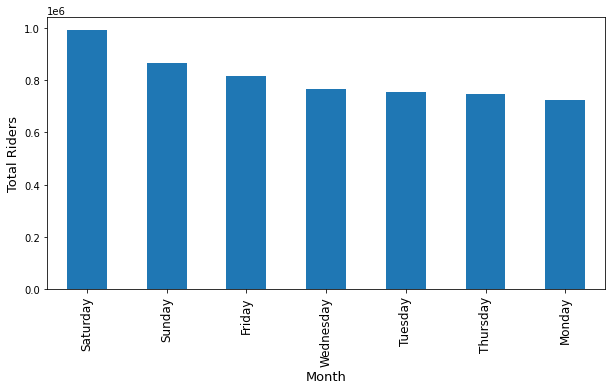

In [ ]:
plt.figure(figsize=(10,5))
final_data['day_of_week'].value_counts().plot(kind='bar')#Trend Findings
plt.xticks(size=12)
plt.xlabel("Month",size=13)
plt.ylabel("Total Riders",size=13)
plt.show()

▶**Observation**:

---



* Weekends both saturday and sunday are the most rides has been taken.
* Let;s dig down further to see the difference w.r.t membership types (casual and annual members)



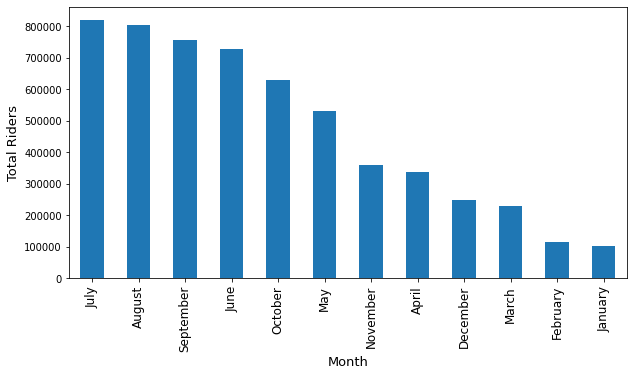

In [ ]:
plt.figure(figsize=(10,5))
final_data['start_month'].value_counts().plot(kind='bar')# July has highest rides taken
plt.xticks(size=12)
plt.xlabel("Month",size=13)
plt.ylabel("Total Riders",size=13)
plt.show()

▶**Observation**:

---


* July,August and September months are most popular usage months

In [ ]:
#Removing all the records where ride length is negative.
final_data.loc[final_data['ride_lenght_in_mins']<0,['started_at','ended_at','ride_lenght','ride_lenght_in_mins']].sort_values(['ride_lenght_in_mins'])

,started_at,ended_at,ride_lenght,ride_lenght_in_mins
56721,2021-11-07 01:58:08,2021-11-07 01:00:06,-1 days +23:01:58,-58.033333
142091,2021-11-07 01:56:51,2021-11-07 01:00:57,-1 days +23:04:06,-55.900000
125855,2021-11-07 01:54:50,2021-11-07 01:00:45,-1 days +23:05:55,-54.083333
260820,2021-11-07 01:55:42,2021-11-07 01:01:55,-1 days +23:06:13,-53.783333
282673,2021-11-07 01:54:58,2021-11-07 01:01:29,-1 days +23:06:31,-53.483333
...,...,...,...,...
241770,2021-09-29 14:02:52,2021-09-29 14:02:51,-1 days +23:59:59,-0.016667
72856,2021-07-27 19:11:55,2021-07-27 19:11:54,-1 days +23:59:59,-0.016667
133756,2021-07-25 01:38:23,2021-07-25 01:38:22,-1 days +23:59:59,-0.016667
398492,2021-05-20 12:31:53,2021-05-20 12:31:52,-1 days +23:59:59,-0.016667


In [ ]:
final_data = final_data.loc[final_data['ride_lenght_in_mins']>0,]

# **Aggregations**

### **Descriptive Analysis**

In [ ]:
# Calculate the mean of ride_length
# Calculate the max ride_length
# Calculate the mode of day_of_week

print("Average of ride_length(Mins)",round(final_data['ride_lenght_in_mins'].mean(),2))
print("Min of ride_length(Mins)",round(final_data['ride_lenght_in_mins'].min(),2))
print("Max of ride_length(hrs)",round(final_data['ride_lenght_in_hrs'].max(),2))

Average of ride_length(Mins) 20.79
Min of ride_length(Mins) 0.02
Max of ride_length(hrs) 932.4


**Observation**:

---


* **~932 Hours.** or **1 Month 8 Day(s)** being used which is looks like an outlier

In [ ]:
final_data[['ride_lenght_in_hrs']].describe()

,ride_lenght_in_hrs
count,5.662716e+06
mean,3.465719e-01
std,2.772635e+00
min,2.777778e-04
25%,1.111111e-01
50%,1.975000e-01
75%,3.588889e-01
max,9.324025e+02


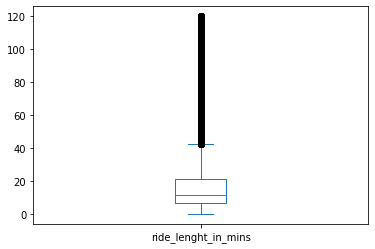

In [ ]:
final_data[['ride_lenght_in_mins']].plot.box()
# final_data.loc[final_data['ride_lenght_in_hrs']<1,['ride_lenght_in_hrs']].plot.box()
plt.show()
# final_data[['ride_lenght_in_hrs']].plot.box()

Observations:
* The above box plot showing that many observations are outliers or suspected values.
* Need to look into futher.

In [ ]:
round(final_data.loc[(final_data['ride_lenght_in_hrs']>2),].shape[0]/final_data.shape[0]*100,2)

1.1

In [ ]:
final_data = final_data[final_data['ride_lenght_in_hrs']<2]

Observations:
* Aournd **99.99%** of the users are using the service less than 2 Hours.
* So discarding those records which travelled greater than **2hrs** as treating them as outliers. Let's tream them sepereately



In [ ]:
# final_data[final_data['ride_lenght_in_hrs']>240]

### **Data Wranglings**

In [ ]:
final_data.member_casual.value_counts(normalize=True)

member    0.557055
casual    0.442945
Name: member_casual, dtype: float64

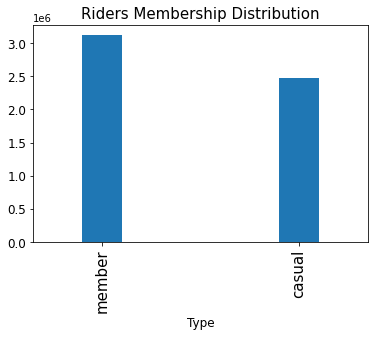

In [ ]:
final_data.member_casual.value_counts().plot(kind='bar',width=0.2)
plt.xlabel("Type",size=12)
plt.xticks(size=15)
plt.yticks(size=12)
plt.title("Riders Membership Distribution",size=15)
plt.show()

**Observations**:

---


* **55.70%** of the customers are opted for Annual Memebership plan.
* **44.29%** of the customers are not opted for *Annual Memebership plan* i.e still they are *causal memebers*.

In [ ]:
# Calculate the average ride_length for members and casual riders
final_data.groupby(['member_casual']).agg({'ride_lenght_in_mins':['mean','min','max']})#.plot(kind='bar')

ride_lenght_in_mins                      
                             mean       min         max
member_casual                                          
casual                  22.239646  0.016667  119.983333
member                  12.674758  0.016667  119.983333

In [ ]:
final_data.pivot_table(index='member_casual', values='ride_lenght_in_mins',aggfunc=np.mean)

,ride_lenght_in_mins
member_casual,
casual,22.239646
member,12.674758


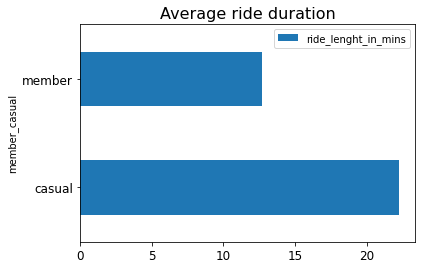

In [ ]:
final_data.pivot_table(index='member_casual', values='ride_lenght_in_mins',aggfunc=np.mean).plot(kind='barh',width=0.5)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Average ride duration",size=16)
plt.show()

In [ ]:
# Calculate the average ride_length for users by day_of_week.
final_data.pivot_table(index='member_casual', columns='day_of_week', values='ride_lenght_in_mins',aggfunc=np.mean)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,20.856506,22.586639,23.976365,25.293050,19.378081,20.432842,19.781902
member,12.390825,12.274630,14.072470,14.392466,11.952822,11.996517,12.041614


**Observation**

---


* More rides being taken by Casual members on **Sunday's** whereas Annual membership users taking more rides on **Saturday's**

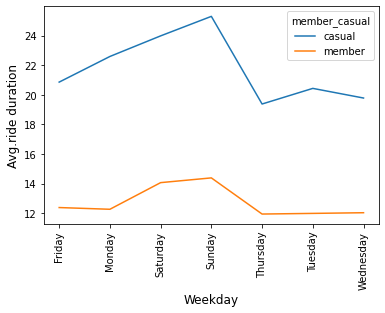

In [ ]:
final_data.pivot_table(index='member_casual', columns='day_of_week', values='ride_lenght_in_mins',aggfunc=np.mean).T.plot()
plt.xticks(rotation=90)
plt.ylabel("Avg.ride duration",size=12)
plt.xlabel("Weekday",size=12)
plt.show()

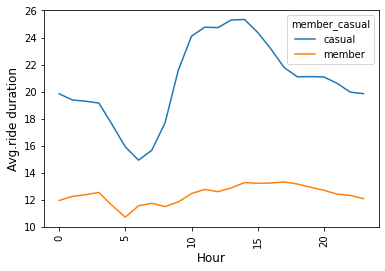

In [ ]:
final_data.pivot_table(index='member_casual', columns='started_hour', values='ride_lenght_in_mins',aggfunc=np.mean).T.plot()
plt.xticks(rotation=90)
plt.ylabel("Avg.ride duration",size=12)
plt.xlabel("Hour",size=12)
plt.show()

* Compare to Annaul Members, Casual members are using the commute from **7 AM** to **5 PM**.

In [ ]:
final_data.pivot_table(index='start_month', values='ride_id',aggfunc='count').sort_values(['ride_id'])

,ride_id
start_month,
January,103155
February,114925
March,225860
December,246367
April,332631
November,358229
May,522732
October,626082
June,718078


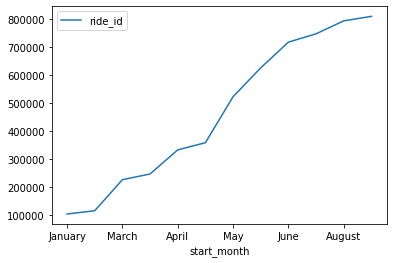

In [ ]:
final_data.pivot_table(index='start_month', values='ride_id',aggfunc='count').sort_values(['ride_id']).plot()
plt.show()


# **Recommendations:**

---



* Launch marketing campaigns in Summer (from June to August).
* Special weekend rates beneficial for longer rides
* Member rewards programs based on covered distance, ride duration, and ride frequencies.


In [ ]:
# Calculate the number of rides for users by day_of_week
final_data.pivot_table(index='day_of_week',columns='start_month',values='ride_id',aggfunc='count')


start_month,April,August,December,February,January,July,June,March,May,November,October,September
day_of_week,,,,,,,,,,,,
Friday,58084,110442,42230,14569,13721,134493,99154,25475,65344,42882,98676,102031
Monday,43213,108822,30052,22651,15712,93353,77986,34410,74810,59630,63319,91465
Saturday,53307,132655,29977,12402,14679,159595,119728,44582,109504,49584,127283,122242
Sunday,49375,140166,23673,15740,11411,107116,111118,34903,101512,43582,99249,113133
Thursday,40145,100636,47573,13449,16463,120021,89611,21349,57964,42497,69170,121314
Tuesday,51485,110010,28287,18957,16070,96683,108216,33698,51568,67087,84221,83311
Wednesday,37022,91445,44575,17157,15099,99097,112265,31443,62030,52967,84164,114392


In [ ]:
## Source stations only rided by any customer only once in entire year.
final_data.start_station_name.value_counts()[final_data.start_station_name.value_counts()==1]

Wilton Ave & Diversey Pkwy - Charging           1
N Damen Ave & W Wabansia St                     1
Hastings WH 2                                   1
Pawel Bialowas - Test- PBSC charging station    1
Lyft Driver Center Private Rack                 1
DIVVY CASSETTE REPAIR MOBILE STATION            1
N Hampden Ct & W Diversey Ave                   1
Whipple St & Irving Park Rd                     1
California & 16th St                            1
Name: start_station_name, dtype: int64

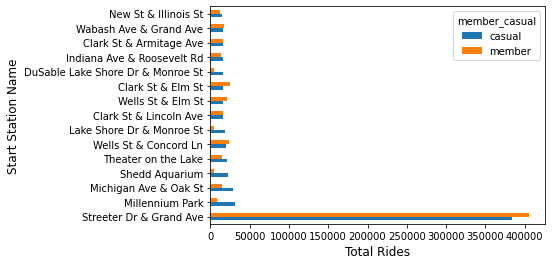

In [ ]:
final_data.pivot_table(index='start_station_name',columns='member_casual',values='ride_id',aggfunc='count').sort_values(['casual','member'],ascending=False).head(15).plot(kind='barh')
plt.ylabel("Start Station Name",size=12)
plt.xlabel("Total Rides",size=12)
plt.show()

* To make the casual mebers to annual members we can make arrange of Advertismet slides and all promotional activities in these areas as shown above.

In [ ]:
final_data.pivot_table(index='rideable_type',columns='member_casual',values='ride_lenght_in_mins',aggfunc=np.mean)

member_casual,casual,member
rideable_type,,
classic_bike,22.238476,13.036543
docked_bike,34.656852,NaN
electric_bike,18.517036,12.031795


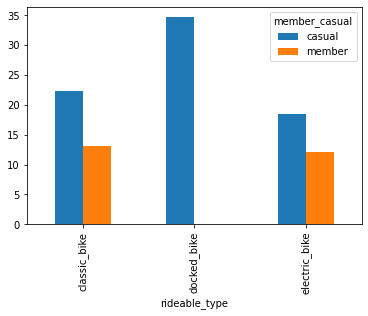

In [ ]:
final_data.pivot_table(index='rideable_type',columns='member_casual',values='ride_lenght_in_mins',aggfunc=np.mean).plot(kind='bar')

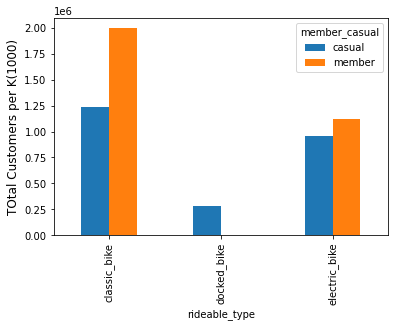

In [ ]:
final_data.pivot_table(index='rideable_type',columns='member_casual',values='ride_id',aggfunc='count').plot(kind='bar')
plt.ylabel("TOtal Customers per K(1000)",size=12)
plt.show()


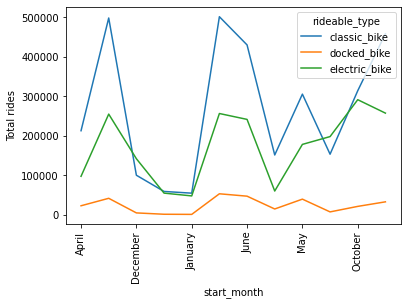

In [ ]:
final_data.pivot_table(index='rideable_type',columns='start_month',values='ride_id',aggfunc='count').T.plot()
plt.ylabel("Total rides")
plt.xticks(rotation=90)
plt.show()


* Docked bikes were least popular compared to classic bike and Electric bikes
* “Classic Bikes” were more popular over the months and more users tend to choose “Classic Bikes” over the “Docked Bikes”.
* It is important to figure out why users tend to prefer “Classic Bikes” more than “Docked Bikes”.

* In the same time, I shows the increase of the popularity of the “Electric Bikes” as well.

# **Recommendations**
* Implement a new annual membership tier at a lower price point where a total number of rides are allotted for a given time period (e.g. week, month), versus current annual membership structure (unlimited number of rides, 45-min. limit per ride), and given that on average, casual riders spend more time on their rides than current members, but on average only 1480 sec.(24.67 min.)
* Implement a limited time promotion for annual membership that loosens limits on Friday, Saturday, Sunday rides, given those are the most popular days casual riders use Cyclistic bikes
* Add more electric bikes to inventory given casual riders prefer them over classic bikes

* Launch marketing campaigns in Summer (from June to August).